In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pickle

In [80]:
data1 = pd.read_csv('data/광산구.csv', encoding = 'euc-kr')
data2 = pd.read_csv('data/북구.csv', encoding = 'euc-kr')
data3 = pd.read_csv('data/서구.csv', encoding = 'euc-kr')
data4 = pd.read_csv('data/남구.csv', encoding = 'euc-kr')
data5 = pd.read_csv('data/동구.csv', encoding = 'euc-kr')


In [81]:
data1

구    동      연령     합계
0    광산구  도산동     0~9   7884
1    광산구  도산동   10~19   9597
2    광산구  도산동   20~29  10062
3    광산구  도산동   30~39  11589
4    광산구  도산동   40~49  13650
..   ...  ...     ...    ...
205  광산구  하남동   50~59  13091
206  광산구  하남동   60~69   6253
207  광산구  하남동   70~79   2623
208  광산구  하남동   80~89   1015
209  광산구  하남동  90~100    179

[210 rows x 4 columns]

In [73]:
bins = [-1,10,20,30,40,50,60,70,80,90,100,101]
labels = ["0~10","10대","20대","30대","40대","50대","60대", "70대", "80대", "90대","100세 이상"]
data1.연령 = pd.cut(data1.연령, bins, labels=labels)

In [74]:
data1

구     동    연령  합계    년도
0      광산구  송정1동  0~10  49  2019
1      광산구  송정1동  0~10  58  2019
2      광산구  송정1동  0~10  56  2019
3      광산구  송정1동  0~10  73  2019
4      광산구  송정1동  0~10  96  2019
...    ...   ...   ...  ..   ...
10600  광산구   신창동   90대   1  2015
10601  광산구   신창동   90대   0  2015
10602  광산구   신창동   90대   0  2015
10603  광산구   신창동   90대   0  2015
10604  광산구   신창동   90대   2  2015

[10605 rows x 5 columns]

In [79]:
data1.groupby('연령').sum()

합계
연령            
0~9     235684
10~19   288629
20~29   268117
30~39   309481
40~49   390351
50~59   279880
60~69   131447
70~79    77293
80~89    32231
90~100    4682

In [67]:
data1.drop(['년도'],axis=1,inplace=True)

In [83]:
data1.동.value_counts()

임곡동     10
수완동     10
하남동     10
비아동     10
삼도동     10
도산동     10
월곡1동    10
첨단2동    10
우산동     10
동곡동     10
운남동     10
평동      10
어룡동     10
신흥동     10
신창동     10
본량동     10
송정2동    10
송정1동    10
월곡2동    10
신가동     10
첨단1동    10
Name: 동, dtype: int64

In [69]:
data1 = data1.groupby('구','동')

ValueError: No axis named 동 for object type DataFrame

In [70]:
data1

구     동    연령  합계
0      광산구  송정1동  0~10  49
1      광산구  송정1동  0~10  58
2      광산구  송정1동  0~10  56
3      광산구  송정1동  0~10  73
4      광산구  송정1동  0~10  96
...    ...   ...   ...  ..
10600  광산구   신창동   90대   1
10601  광산구   신창동   90대   0
10602  광산구   신창동   90대   0
10603  광산구   신창동   90대   0
10604  광산구   신창동   90대   2

[10605 rows x 4 columns]

ValueError: Wedge sizes 'x' must be non negative values

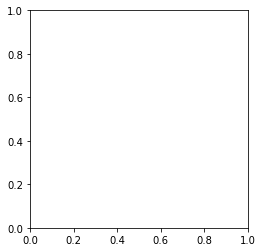

In [32]:
ratio = [-1,10,20,30,40,50,60,70,80,90,100,101]
labels = ["0~10","10대","20대","30대","40대","50대","60대", "70대", "80대", "90대","100세 이상"]

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()